In [111]:
import numpy as np
from qutip import *
from qutip.qip.operations import rx
import scipy as sp
from scipy.optimize import curve_fit,fsolve
from scipy.special import erfc,erf
import os
import sys
import time
from copy import deepcopy
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.constants as sc


In [112]:
from pyfonts import load_font
mpl.rcParams['mathtext.fontset']='cm'
font = load_font(
   font_url="https://github.com/openmaptiles/fonts/blob/master/roboto/Roboto-Regular.ttf?raw=true"
)

#plt.rcParams['font.family'] = 'Roboto Regular'

findfont: Font family 'Roboto Regular' not found.
findfont: Font family ['Roboto Regular'] not found. Falling back to DejaVu Sans.


findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.


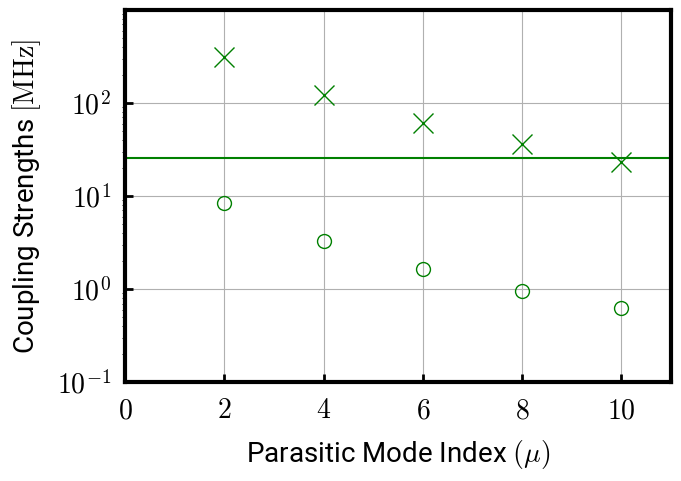

In [113]:
#coupling strength
fig,ax=plt.subplots(1,1,figsize=(8,6))
N=122
g_q1=np.load("Coupling_Strengths_H1.npz")['coupling_q']*(10**3)
g_q2=np.load("Coupling_Strengths_H2.npz")['coupling_q']*(10**3)
g_q3=np.load("Coupling_Strengths_H3.npz")['coupling_q']*(10**3)

g_p1=np.load("Coupling_Strengths_H1.npz")['coupling_p']*(10**3)
g_p2=np.load("Coupling_Strengths_H2.npz")['coupling_p']*(10**3)
g_p3=np.load("Coupling_Strengths_H3.npz")['coupling_p']*(10**3)

g_pq1=np.load("Coupling_Strengths_H1.npz")['coupling_pq']*(10**3)
g_pq2=np.load("Coupling_Strengths_H2.npz")['coupling_pq']*(10**3)
g_pq3=np.load("Coupling_Strengths_H3.npz")['coupling_pq']*(10**3)

n=np.linspace(0,N-1,N)
plt.plot(n,[g_q1]*(int(N)),'-',color='green',label='Qubit-Readout Coupling-H1')
plt.plot(n,g_p1,'.',markersize=20,markerfacecolor='none',color='green',label='Parasitic-Readout Coupling-H1')
plt.plot(n,g_pq1,'x',markersize=14,markerfacecolor='none',color='green',label='Qubit-Parasitic-H1')

ax.set_xlabel(r'Parasitic Mode Index $(\mu)$',fontsize=20,font=font,labelpad=10)
ax.set_ylabel(r'Coupling Strengths $\mathrm{[MHz]}$',fontsize=20,font=font,labelpad=10)
ax.set_yscale('log')
ax.set_yticks([10**(-1),10**(0),10**(1),10**(2)],[r"$10^{-1}$",r"$10^0$",r"$10^1$",r"$10^2$"],fontsize=20)
ax.tick_params(axis="y", direction='in', length=6, width=2, which='major',pad=10)
ax.set_xticks([0,2,4,6,8,10],[r"$0$",r"$2$",r"$4$",r"$6$",r"$8$",r"$10$"],fontsize=20)
ax.tick_params(axis="x", direction='in', length=6, width=2,which='major',pad=10)
for axis in ['top','bottom','left','right'] :
    ax.spines[axis].set_linewidth(3)
    
fig.tight_layout(pad=5) 
ax.set_xlim(0,11)
ax.set_ylim(10**(-1),1000)
plt.grid()
plt.savefig('Supplement_Figures/Coupling_Strength.pdf', dpi=300,transparent=True)
plt.show()

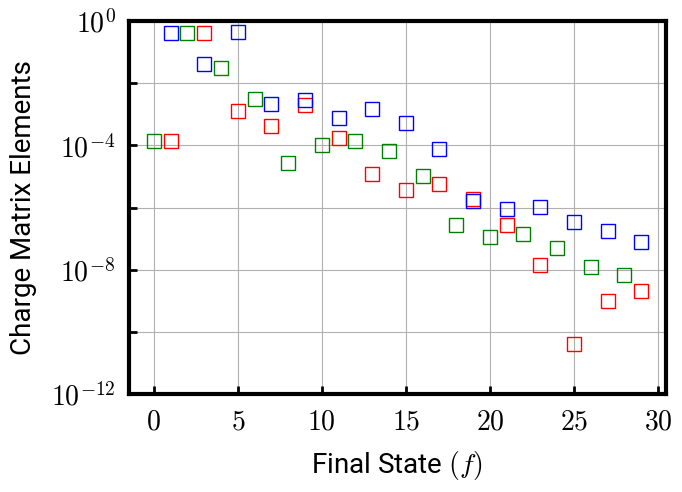

In [114]:
#Charge Matrix Elements
fig,ax=plt.subplots(1,1,figsize=(8,6))

p10=np.load("Charge_Matrix.npz")['p0']
p11=np.load("Charge_Matrix.npz")['p1']
p12=np.load("Charge_Matrix.npz")['p2']

ax.plot(p10[:30],'s',markersize=10,markerfacecolor='none',color='red',label=r'$H_1:|\langle 0|n_\phi|l\rangle|^2$')
ax.plot(p11[:30],'s',markersize=10,markerfacecolor='none',color='green',label=r'$H_1:|\langle 1|n_\phi|l\rangle|^2$')
ax.plot(p12[:30],'s',markersize=10,markerfacecolor='none',color='blue',label=r'$H_1:|\langle 1|n_\phi|l\rangle|^2$')
ax.set_xlabel(r'Final State $(f)$',font=font,fontsize=20,labelpad=10)
ax.set_ylabel('Charge Matrix Elements',font=font,fontsize=20,labelpad=10)
ax.set_yscale('log')
ax.set_yticks([10**(-12),10**(-10),10**(-8),10**(-6),10**(-4),10**(-2),10**(0)],[r"$10^{-12}$","",r"$10^{-8}$","",r"$10^{-4}$","",r"$10^{0}$"],font=font,fontsize=20)
ax.tick_params(axis="y", direction='in', length=6, width=2, which='major',pad=10)
ax.set_xticks([0,5,10,15,20,25,30],[r"$0$",r"$5$",r"$10$",r"$15$",r"$20$",r"$25$",r"$30$"],font=font,fontsize=20)
ax.tick_params(axis="x", direction='in', length=6, width=2,pad=10)
for axis in ['top','bottom','left','right'] :
    ax.spines[axis].set_linewidth(3)
    
fig.tight_layout(pad=5) 
plt.ylim(10**(-12),1)
plt.grid()
plt.savefig('Supplement_Figures/Charge_Matrix.pdf', dpi=300,transparent=True)
plt.show()

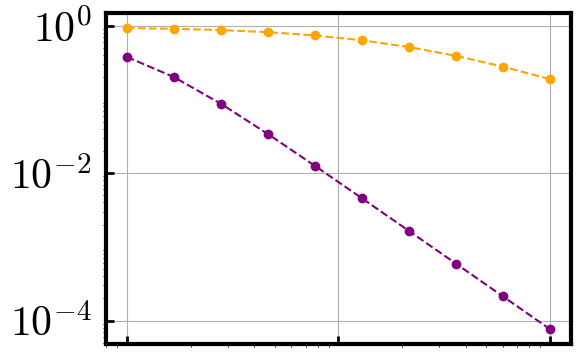

In [115]:
Count=np.geomspace(100,10000,10)
ChargeN=np.load("qubit-energy-N.npy")
ChargepN=np.load("parasitic-energy-N.npy")
fig, ax = plt.subplots(1,1,figsize=(7,4.75))
ax.plot(Count,ChargepN,'--o',color='purple')
ax.plot(Count,ChargeN,'--o',color='orange')
ax.set_xscale('log')
#ax.set_xlabel(r'$N$',font=font,fontsize=15,labelpad=10)
#ax.set_ylabel('Charging Energies',font=font,fontsize=15,labelpad=10)
ax.set_yscale('log')
ax.set_yticks([10**(-4),10**(-2),10**(0)],[r"$10^{-4}$",r"$10^{-2}$",r"$10^{0}$"],font=font,fontsize=30)
ax.tick_params(axis="y", direction='in', length=6, width=2, which='major',pad=10)
ax.set_xticks([10**(2),10**(3),10**(4)],[r"",r"",r""],font=font,fontsize=30)
ax.tick_params(axis="x", direction='in', length=6, width=2,pad=10)
for axis in ['top','bottom','left','right'] :
    ax.spines[axis].set_linewidth(3)
    
fig.tight_layout(pad=5) 

plt.grid()
plt.savefig('Supplement_Figures/Charging-Energy-N.pdf', dpi=300, format="pdf",transparent=True)
plt.show()

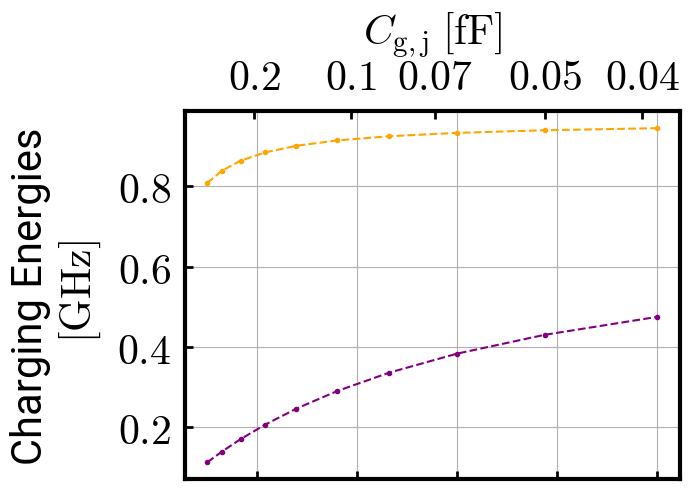

In [116]:
Ground=np.geomspace(50,500,10)
fig, ax = plt.subplots(1,1,figsize=(7,5))
ChargeG=np.load("qubit-energy-G.npy")
ChargepG=np.load("parasitic-energy-G.npy")
ax.plot(Ground,ChargeG,'.--',color='orange',label='N')
ax2 = ax.twiny()
ax2.plot(Ground,ChargepG,'.--',color='purple',label='Eg')
ax2.set_xlabel(r'$C_\mathrm{g,j}$ $\mathrm{[fF]}$',font=font,fontsize=30,labelpad=10)
ax.set_ylabel('Charging Energies'+'\n'+' $\mathrm{[GHz]}$',font=font,fontsize=30,labelpad=10)
ax.set_yticks([0.2,0.4,0.6,0.8],[r"$0.2$",r"$0.4$",r"$0.6$",r"$0.8$"],font=font,fontsize=30)
ax.tick_params(axis="y", direction='in', length=6, width=2, which='major',pad=10)
ax2.set_xticks(19.4/np.array([0.2,0.1,0.07,0.05,0.04]),[r"$0.2$",r"$0.1$",r"$0.07$",r"$0.05$",r"$0.04$"],font=font,fontsize=30)
ax.set_xticks([100,200,300,400,500],[r"",r"",r"",r"",r""],font=font,fontsize=30)
ax.tick_params(axis="x", direction='in', length=6, width=2,pad=10)
ax2.tick_params(axis="x", direction='in', length=6, width=2,pad=10)
for axis in ['top','bottom','left','right'] :
    ax.spines[axis].set_linewidth(3)
    
fig.tight_layout() 
ax.grid()
plt.savefig('Supplement_Figures/Charging-Energy-G.pdf', dpi=300, format="pdf",transparent=True)
plt.show()

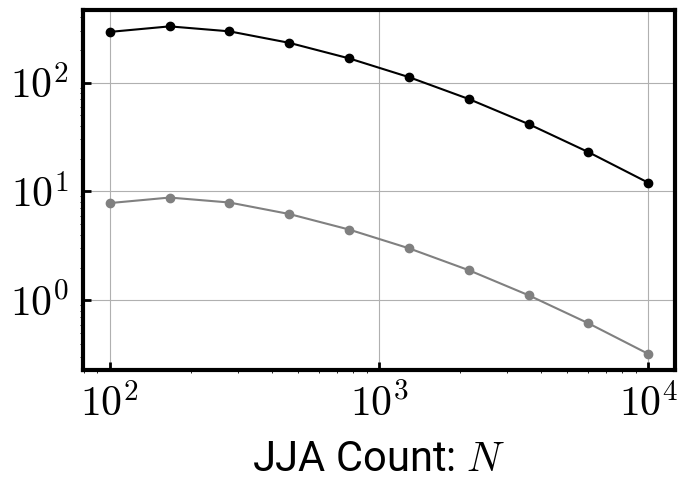

In [117]:
fig, ax = plt.subplots(1,1,figsize=(7,5))
CouplingpN=np.load("couplingpN.npy")
CouplingpqN=np.load("couplingpqN.npy")
ax.plot(Count,np.array(CouplingpN)*(10**3),'-o',color='gray')
ax.plot(Count,np.array(CouplingpqN)*(10**3),'-o',color='black')
ax.set_xscale('log')
ax.set_xlabel(r'JJA Count: $N$',font=font,fontsize=30,labelpad=10)
#ax.set_ylabel('Coupling Strengths [MHz]',font=font,fontsize=15,labelpad=10)
ax.set_yscale('log')
ax.set_yticks([10**(0),10**(1),10**(2)],[r"$10^{0}$",r"$10^{1}$",r"$10^{2}$"],font=font,fontsize=30)
ax.tick_params(axis="y", direction='in', length=6, width=2, which='major',pad=10)
ax.set_xticks([10**(2),10**(3),10**(4)],[r"$10^{2}$",r"$10^{3}$",r"$10^{4}$"],font=font,fontsize=30)
ax.tick_params(axis="x", direction='in', length=6, width=2,pad=10)
for axis in ['top','bottom','left','right'] :
    ax.spines[axis].set_linewidth(3)
    
fig.tight_layout() 
ax.grid()
plt.savefig('Supplement_Figures/Coupling-N.pdf', format="pdf", dpi=300,transparent=True)
plt.show()

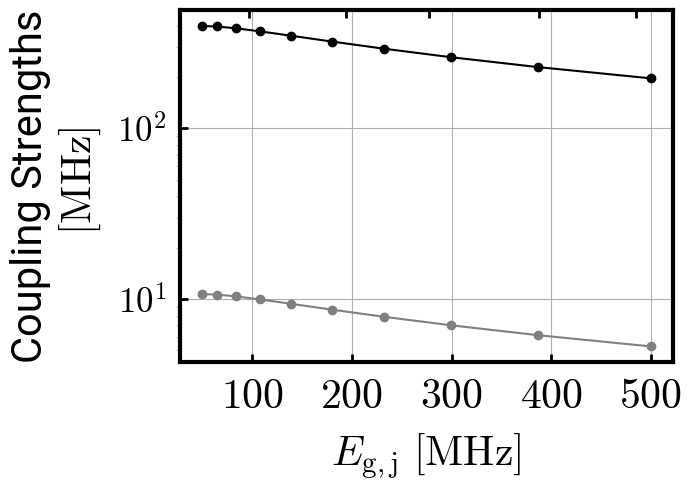

In [118]:
fig, ax = plt.subplots(1,1,figsize=(7,5))
CouplingpG=np.array(np.load("couplingpG.npy"))
CouplingpqG=np.array(np.load("couplingpqG.npy"))
ax.plot(Ground,CouplingpG*(10**3),'-o',color='gray')
ax2 = ax.twiny()
ax2.plot(Ground,CouplingpqG*(10**3),'-o',color='black')
ax.set_xlabel(r'$E_\mathrm{g,j} \ \mathrm{[MHz]}$',font=font,fontsize=30,labelpad=10)
ax.set_ylabel('Coupling Strengths'+'\n'+' $\mathrm{[MHz]}$',font=font,fontsize=30,labelpad=10)
ax.set_yscale('log')
ax.set_yticks([10,100],[r"$10^1$",r"$10^2$"],font=font,fontsize=25)
ax.tick_params(axis="y", direction='in', length=6, width=2, which='major',pad=10)
ax2.set_xticks(19.4/np.array([0.2,0.1,0.07,0.05,0.04]),[r"",r"",r"",r"",r""],font=font,fontsize=30)
ax.set_xticks([100,200,300,400,500],[r"$100$",r"$200$",r"$300$",r"$400$",r"$500$"],font=font,fontsize=30)
ax.tick_params(axis="x", direction='in', length=6, width=2,pad=10)
ax2.tick_params(axis="x", direction='in', length=6, width=2,pad=10)
for axis in ['top','bottom','left','right'] :
    ax.spines[axis].set_linewidth(3)
    
fig.tight_layout() 
ax.grid()
plt.savefig('Supplement_Figures/Coupling-G.pdf', format="pdf", dpi=300,transparent=True)
plt.show()

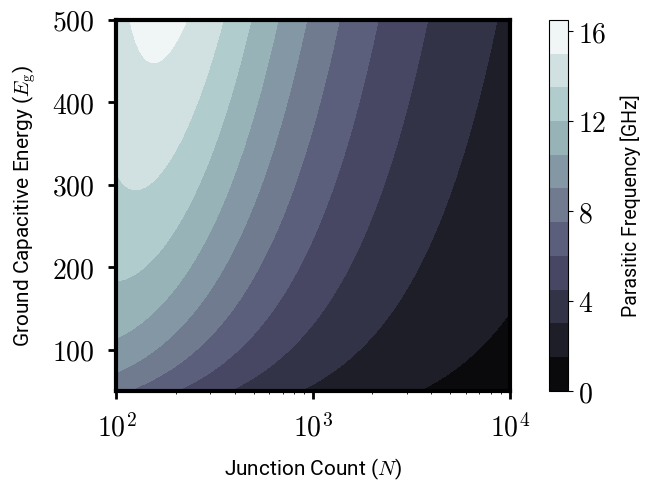

In [119]:
#Dephasing
X=np.geomspace(100,10000,100)
Y=np.linspace(50,500,100)
Z=np.load("freq.npy")

fig, ax2 = plt.subplots(layout='constrained')
plt.rc('font', family='Roboto Regular')
CS = ax2.contourf(X, Y, Z, 10, cmap=plt.cm.bone)
#CS2 = ax2.contour(CS, levels=CS.levels[::2], colors='b')

ax2.set_xlabel(r"Junction Count"+r" ($N$)",font=font,fontsize=15,labelpad=10)
ax2.set_ylabel("Ground Capacitive Energy" +r" ($E_\mathrm{g}$)",font=font,fontsize=15,labelpad=10)
cbar = fig.colorbar(CS)
cbar.ax.set_ylabel(r'Parasitic Frequency [GHz]',font=font,x=1.0,fontsize=14,labelpad=10)
cbar.ax.set_yticks([0,4,8,12,16],[r"$0$",r"$4$",r"$8$",r"$12$",r"$16$"],font=font,fontsize=20)
# Add the contour line levels to the colorbar
#cbar.add_lines(CS2)
ax2.set_yticks([100,200,300,400,500],[r"$100$",r"$200$",r"$300$",r"$400$",r"$500$"],font=font,fontsize=20)
ax2.tick_params(axis="y", direction='out', length=6, width=2, which='major',pad=10)
ax2.set_xscale('log')
ax2.set_xticks([100,1000,10000],[r"$10^2$",r"$10^3$",r"$10^4$"],font=font,fontsize=20)
ax2.tick_params(axis="x", direction='out', length=6, width=2,pad=10)
for axis in ['top','bottom','left','right'] :
    ax2.spines[axis].set_linewidth(3)
    
#ax2.tight_layout(pad=5) 

plt.savefig("Supplement_Figures/par_freq.pdf", dpi=300)
plt.show()

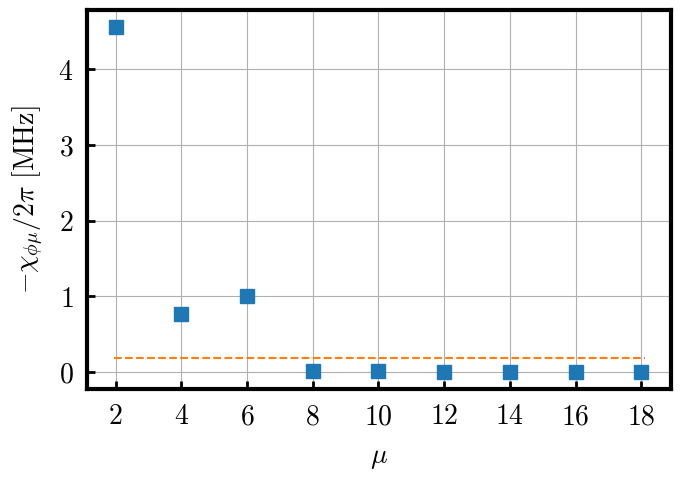

In [120]:
chi_qr1=0.19139230399814832 

chi_pq1=np.load("dispersive_shift.npz")['chi_pq']*(10**3)
fig, ax = plt.subplots(1,1,figsize=(8,6))
mu=np.linspace(2,18,9)
mu1=np.linspace(1.95,18.1,10)
ax.plot(mu,np.abs(chi_pq1[2:20:2]),'s',markersize=10,label='H1')
ax.plot(mu1,[chi_qr1]*10,'--',markersize=10,markerfacecolor="none",label='H1')
ax.set_xlabel(r'$\mu$',font=font,fontsize=20,labelpad=10)
ax.set_ylabel('$-\chi_{\phi\mu}/2\pi \ \mathrm{[MHz]}$',font=font,fontsize=20,labelpad=10)
#ax.set_xlim(0,10)
ax.set_yticks([0,1,2,3,4],[r"$0$",r"$1$",r"$2$",r"$3$",r"$4$"],font=font,fontsize=20)
ax.tick_params(axis="y", direction='in', length=6, width=2, which='major',pad=10)
ax.set_xticks([2,4,6,8,10,12,14,16,18],[r"$2$",r"$4$",r"$6$",r"$8$",r"$10$",r"$12$",r"$14$",r"$16$",r"$18$"],font=font,fontsize=20)
ax.tick_params(axis="x", direction='in', length=6, width=2,pad=10)
for axis in ['top','bottom','left','right'] :
    ax.spines[axis].set_linewidth(3)
    
fig.tight_layout(pad=5) 
ax.grid()
plt.savefig('Supplement_Figures/dispersive.pdf', format="pdf", dpi=300,transparent=True)
plt.show()

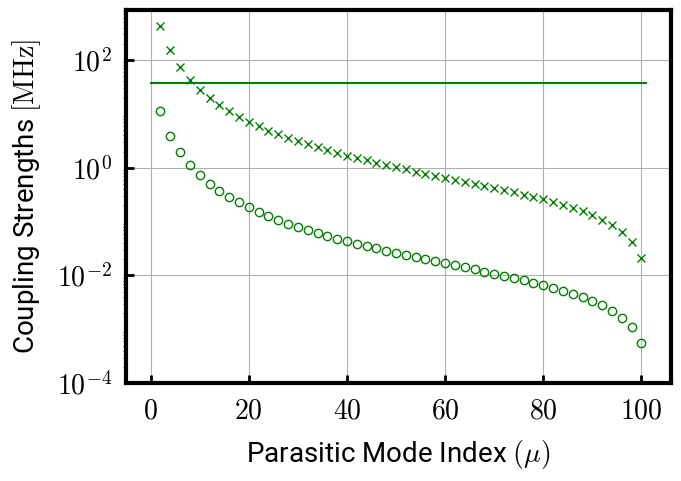

In [121]:
#coupling strength
fig,ax=plt.subplots(1,1,figsize=(8,6))
g_q1=np.load("g_q1-Will.npy")*(10**3)
g_q2=np.load("g_q2-Will.npy")*(10**3)
g_q3=np.load("g_q3-Will.npy")*(10**3)

g_p1=np.load("g_p1-Will.npy")*(10**3)
g_p2=np.load("g_p2-Will.npy")*(10**3)
g_p3=np.load("g_p3-Will.npy")*(10**3)

g_pq1=np.load("g_pq1-Will.npy")*(10**3)
g_pq2=np.load("g_pq2-Will.npy")*(10**3)
g_pq3=np.load("g_pq3-Will.npy")*(10**3)

N_Will=102
n=np.linspace(0,N_Will-1,N_Will)
plt.plot(n,[g_q1]*(int(N_Will)),'-',color='green',label='Qubit-Readout Coupling-H1')
plt.plot(n,g_p1,'o',markerfacecolor='none',color='green',label='Parasitic-Readout Coupling-H1')
plt.plot(n,g_pq1,'x',color='green',label='Qubit-Parasitic-H1')

ax.set_xlabel(r'Parasitic Mode Index $(\mu)$',font=font,fontsize=20,labelpad=10)
ax.set_ylabel('Coupling Strengths $\mathrm{[MHz]}$',font=font,fontsize=20,labelpad=10)
ax.set_yscale('log')
ax.set_yticks([10**(-4),10**(-2),10**(0),10**(2)],[r"$10^{-4}$",r"$10^{-2}$",r"$10^{0}$",r"$10^2$"],font=font,fontsize=20)
ax.tick_params(axis="y", direction='in', length=6, width=2, which='major',pad=10)
ax.set_xticks([0,20,40,60,80,100],[r"$0$",r"$20$",r"$40$",r"$60$",r"$80$",r"$100$"],font=font,fontsize=20)
ax.tick_params(axis="x", direction='in', length=6, width=2,pad=10)
for axis in ['top','bottom','left','right'] :
    ax.spines[axis].set_linewidth(3)
    
fig.tight_layout(pad=5) 

plt.grid()
plt.savefig('Supplement_Figures/Coupling_Strength_Will.pdf', dpi=300,transparent=True)
plt.show()

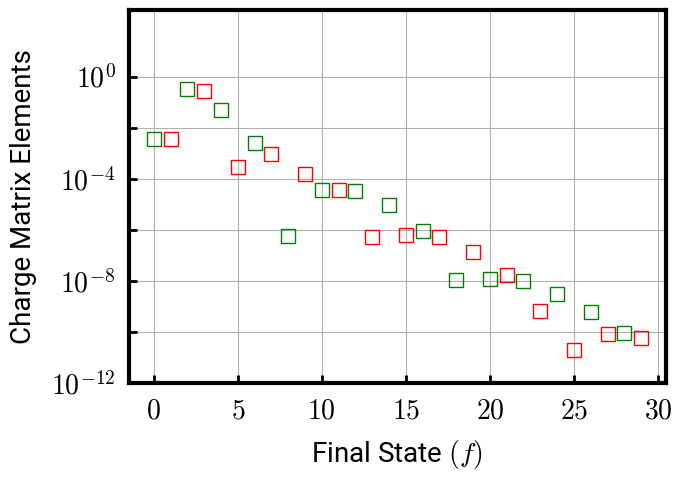

In [122]:
#Charge Matrix Elements
fig,ax=plt.subplots(1,1,figsize=(8,6))
p10=np.load("charge_10-Will.npy")
p11=np.load("charge_11-Will.npy")
p12=np.load("charge_12-Will.npy")
p20=np.load("charge_20-Will.npy")
p21=np.load("charge_21-Will.npy")
p22=np.load("charge_22-Will.npy")
p30=np.load("charge_30-Will.npy")
p31=np.load("charge_31-Will.npy")
p32=np.load("charge_32-Will.npy")

ax.plot(p10[:30],'s',markersize=10,markerfacecolor='none',color='red',label=r'$H_1:|\langle 0|n_\phi|l\rangle|^2$')
ax.plot(p11[:30],'s',markersize=10,markerfacecolor='none',color='green',label=r'$H_1:|\langle 1|n_\phi|l\rangle|^2$')
ax.set_xlabel(r'Final State $(f)$',font=font,fontsize=20,labelpad=10)
ax.set_ylabel('Charge Matrix Elements',font=font,fontsize=20,labelpad=10)
ax.set_yscale('log')
ax.set_yticks([10**(-12),10**(-10),10**(-8),10**(-6),10**(-4),10**(-2),10**(0)],[r"$10^{-12}$","",r"$10^{-8}$","",r"$10^{-4}$","",r"$10^{0}$"],font=font,fontsize=20)
ax.tick_params(axis="y", direction='in', length=6, width=2, which='major',pad=10)
ax.set_xticks([0,5,10,15,20,25,30],[r"$0$",r"$5$",r"$10$",r"$15$",r"$20$",r"$25$",r"$30$"],font=font,fontsize=20)
ax.tick_params(axis="x", direction='in', length=6, width=2,pad=10)
for axis in ['top','bottom','left','right'] :
    ax.spines[axis].set_linewidth(3)
    
fig.tight_layout(pad=5) 
plt.ylim(10**(-12))
plt.grid()
plt.savefig('Supplement_Figures/Charge_Matrix_Will.pdf', dpi=300,transparent=True)
plt.show()

In [157]:
print(name_2)

[9.03353353e+00 4.20000000e+01 6.29621503e-04]


/var/folders/k1/xhhmv5bx629_dx3jv43kpn_80000gr/T/ipykernel_43048/1002032804.py:43: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[i].legend(fontsize=15,frameon=False)
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findf

[0, 1]
[8.656764507650113, 8.661522964860037]


findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.


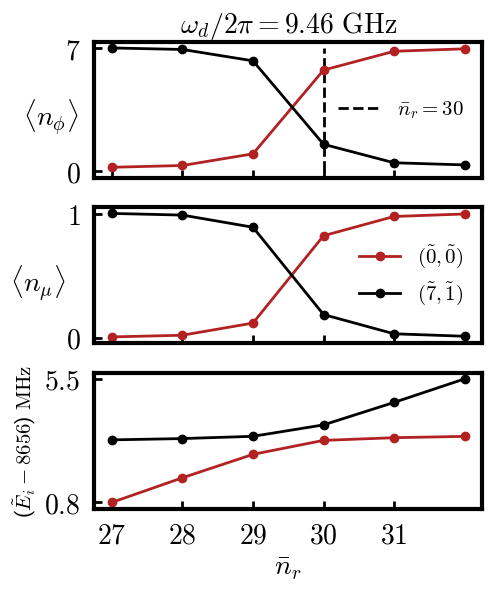

In [268]:
j=0
k=3
name_0=np.load('Will_Trans_'+str(j)+'_'+str(k)+'.npz')['arr_0']
states=np.load('Will_States_'+str(j)+'_'+str(k)+'.npz')['arr_0']
name_2=np.load('Will_Data_'+str(j)+'_'+str(k)+'.npz')['arr_0']
fig,ax=plt.subplots(3,1,figsize=(5,6))
col=[["firebrick","forestgreen","royalblue"][j],"black","gray"]

omegad=np.round(name_2[0]*100)/100
gap=int(name_2[1])
x1=gap-3
y1=gap+3
pq_ex=name_0[0]
pp_ex=name_0[1]
en_ex=name_0[2]
nr=np.linspace(0,50,51)
#we need to make this permamnent
x_ticks=np.linspace(x1,y1,6,dtype=int)
y_ticks_phi=[states[i][1] for i in range(len(states))]
y_ticks_mu=[states[i][0] for i in range(len(states))]
if y_ticks_mu[1]==0:
    y_ticks_mu[1]=int(max(pp_ex[1][x1:y1])*100)/100
print(y_ticks_mu)
min_en=min([min(en_ex[i][x1:y1]) for i in range(len(states))])
max_en=max([max(en_ex[i][x1:y1]) for i in range(len(states))])
en_min=int(min_en*1000)
en_ticks1=[min_en,max_en]
en_ticks=[np.round((min_en*1000-en_min)*10)/10,np.round((max_en*1000-en_min)*10)/10]
print(en_ticks1)
ax[0].set_yticks(y_ticks_phi,[fr"${v}$" for v in y_ticks_phi],font=font,fontsize=20)
ax[1].set_yticks(y_ticks_mu,[fr"${v}$" for v in y_ticks_mu],font=font,fontsize=20)
ax[0].set_xticks(x_ticks,list([""]*len(x_ticks)),font=font,fontsize=20)
ax[1].set_xticks(x_ticks,list([""]*len(x_ticks)),font=font,fontsize=20)
ax[2].set_xticks(x_ticks,[fr"${v}$" for v in x_ticks],font=font,fontsize=20)
ax[2].set_yticks(en_ticks1,[fr"${v}$" for v in en_ticks],font=font,fontsize=20)
ax[0].plot([gap]*(y1-x1),np.linspace(min(y_ticks_phi),max(y_ticks_phi),y1-x1),'--',linewidth=2,color="black",label=r"$\bar n_r=$"+fr"${gap}$")
 
for i in range(len(states)):
    ax[1].plot(nr[x1:y1],pp_ex[i][x1:y1],'-o',linewidth=2,color=col[i],label=r"$($"+fr"$\tilde{states[i][1]}$"+r"$, $"+fr"$\tilde{states[i][0]}$"+r"$)$")
    ax[0].plot(nr[x1:y1],pq_ex[i][x1:y1],'-o',linewidth=2,color=col[i])
    ax[2].plot(nr[x1:y1],en_ex[i][x1:y1],'-o',linewidth=2,color=col[i])
for i in range(3):
    ax[i].legend(fontsize=15,frameon=False)
    ax[i].tick_params(axis="y", direction='in', length=6, width=2, which='major',pad=10)
ax[0].set_ylabel(r"$\langle n_\phi\rangle$",rotation=0,y=0.3, font=font,fontsize=20,labelpad=10)
ax[1].set_ylabel(r"$\langle n_\mu\rangle$", rotation=0,y=0.3,font=font,fontsize=20,labelpad=20)
ax[2].set_xlabel(r"$\bar n_r$",font=font, fontsize=20)
ax[2].set_ylabel(r"($\tilde{E}_i-$"+fr"${en_min}$)"+r"$ \ \mathrm{MHz}$",font=font, fontsize=15)
ax[0].set_title(r"$\omega_d/2\pi=$"+fr"${omegad}$"+r"$ \ \mathrm{GHz}$",font=font, fontsize=20)
for i in range(3):
    ax[i].tick_params(axis="x", direction='in', length=6, width=2, which='major',pad=10)
    for axis in ['top','bottom','left','right'] :
        ax[i].spines[axis].set_linewidth(3)
        ax[i].spines[axis].set_linewidth(3)
fig.tight_layout(pad=1)
plt.savefig('Supplement_Figures/Will_Trans_'+str(j)+'_'+str(k)+'.pdf',dpi=300,transparent=True)
plt.show()

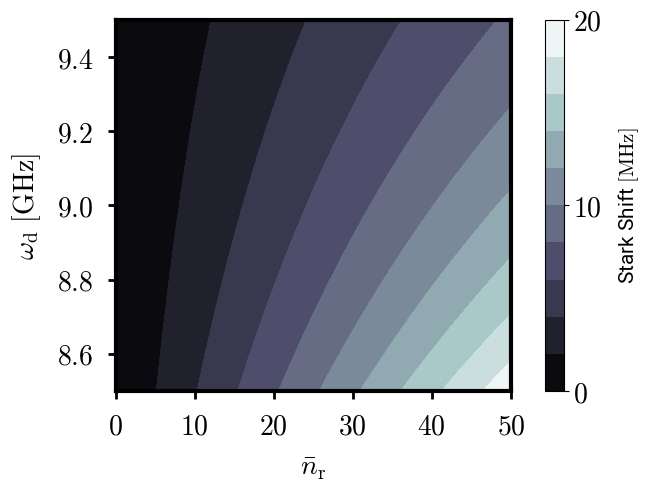

In [123]:
#Dephasing
X=np.linspace(8.5,9.5,1000)
Y=np.linspace(0,50,51)
Z=np.load("Stark_2.npz")['arr_0']

fig1, ax2 = plt.subplots(layout='constrained')
CS = ax2.contourf(Y, X, Z*1000, 10, cmap=plt.cm.bone)
#CS2 = ax2.contour(CS, levels=CS.levels[::2], colors='b')

#ax2.set_title('Nonsense (3 masked regions)')
ax2.set_ylabel(r'$\omega_\mathrm{d} \ [\mathrm{GHz}]$',font=font,fontsize=20,labelpad=10)
ax2.set_xlabel(r'$\bar n_\mathrm{r}$',font=font,fontsize=20,labelpad=10)
# Make a colorbar for the ContourSet returned by the contourf call.
cbar = fig1.colorbar(CS)
cbar.ax.set_ylabel(r"Stark Shift $[\mathrm{MHz}]$",x=1.0,font=font,fontsize=15,labelpad=10)
cbar.ax.set_yticks([0,10,20],[r"$0$",r"$10$",r"$20$"],font=font,fontsize=20)
# Add the contour line levels to the colorbar
#cbar.add_lines(CS2)
ax2.tick_params(axis="y", direction='out', length=6, width=2, which='major',pad=10)
ax2.set_xticks([0,10,20,30,40,50],[r"$0$",r"$10$",r"$20$",r"$30$",r"$40$",r"$50$"],font=font,fontsize=20)
ax2.set_yticks([8.6,8.8,9.0,9.2,9.4],[r"$8.6$",r"$8.8$",r"$9.0$",r"$9.2$",r"$9.4$"],font=font,fontsize=20)
ax2.tick_params(axis="x", direction='out', length=6, width=2,pad=10)
for axis in ['top','bottom','left','right'] :
    ax2.spines[axis].set_linewidth(3)
    
#fig.tight_layout(pad=5) 

plt.savefig("Supplement_Figures/Stark-shift-2.pdf", dpi=300,transparent=True)
plt.show()

[0, 1]


ValueError: min() arg is an empty sequence

findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.
findfont: Font family 'Roboto Regular' not found.


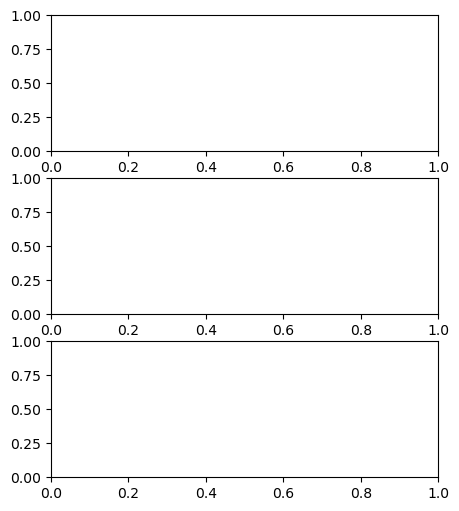

In [ ]:
j=2
k=1
name_0=np.load('Trans_'+str(j)+'_'+str(k)+'.npz')['arr_0']
states=np.load('States_'+str(j)+'_'+str(k)+'.npz')['arr_0']
name_2=np.load('Data_'+str(j)+'_'+str(k)+'.npz')['arr_0']
name_3=np.load('Stark_'+str(j)+'_'+str(k)+'.npz')['arr_0']
fig,ax=plt.subplots(3,1,figsize=(5,6))
col=[["firebrick","forestgreen","royalblue"][j],"black","gray"]

omegad=np.round(name_2[0]*100)/100
gap=int(name_2[1])
x1=gap-3
y1=gap+3
pq_ex=name_0[0]
pp_ex=name_0[1]
en_ex=name_0[2]
nr=np.linspace(0,50,51)
#we need to make this permamnent
x_ticks=np.linspace(x1,y1,6,dtype=int)
y_ticks_phi=[states[i][1] for i in range(len(states))]
y_ticks_mu=[states[i][0] for i in range(len(states))]
if y_ticks_mu[1]==0:
    y_ticks_mu[1]=int(max(pp_ex[1][x1:y1])*1000)/1000
print(y_ticks_mu)
min_en=min([min(en_ex[i][x1:y1]) for i in range(len(states))])
max_en=max([max(en_ex[i][x1:y1]) for i in range(len(states))])
en_min=int(min_en*1000)
en_ticks1=[min_en,max_en]
en_ticks=[np.round((min_en*1000-en_min)*10)/10,np.round((max_en*1000-en_min)*10)/10]
print(en_ticks1)
print(en_ticks)
ax[0].set_yticks(y_ticks_phi,[fr"${v}$" for v in y_ticks_phi],font=font,fontsize=20)
ax[1].set_yticks(y_ticks_mu,[fr"${v}$" for v in y_ticks_mu],font=font,fontsize=20)
ax[0].set_xticks(x_ticks,list([""]*len(x_ticks)),font=font,fontsize=20)
ax[1].set_xticks(x_ticks,list([""]*len(x_ticks)),font=font,fontsize=20)
ax[2].set_xticks(x_ticks,[fr"${v}$" for v in x_ticks],font=font,fontsize=20)
ax[2].set_yticks(en_ticks1,[fr"${v}$" for v in en_ticks],font=font,fontsize=20)
ax[0].plot([gap]*(y1-x1),np.linspace(min(y_ticks_phi),max(y_ticks_phi),y1-x1),'--',linewidth=2,color="black",label=r"$\bar n_r=$"+fr"${gap}$")
 
for i in range(len(states)):
    ax[1].plot(nr[x1:y1],pp_ex[i][x1:y1],'-o',linewidth=2,color=col[i],label=r"$($"+fr"$\tilde{states[i][1]}$"+r"$, $"+fr"$\tilde{states[i][0]}$"+r"$)$")
    ax[0].plot(nr[x1:y1],pq_ex[i][x1:y1],'-o',linewidth=2,color=col[i])
    ax[2].plot(nr[x1:y1],en_ex[i][x1:y1],'-o',linewidth=2,color=col[i])
    ax[2].plot(nr[x1:y1],name_3[i][x1:y1],'--',linewidth=2,color=col[i])
for i in range(3):
    ax[i].legend(fontsize=15,frameon=False)
    ax[i].tick_params(axis="y", direction='in', length=6, width=2, which='major',pad=10)
ax[0].set_ylabel(r"$\langle n_\phi\rangle$",rotation=0,y=0.3, font=font,fontsize=20,labelpad=20)
ax[1].set_ylabel(r"$\langle n_\mu\rangle$", rotation=0,y=0.3,font=font,fontsize=20,labelpad=30)
ax[2].set_xlabel(r"$\bar n_r$",font=font, fontsize=20)
ax[2].set_ylabel(r"($\tilde{E}_i-$"+fr"${en_min}$)"+r"$ \ \mathrm{MHz}$",font=font, fontsize=15,labelpad=10)
ax[0].set_title(r"$\omega_d/2\pi=$"+fr"${omegad}$"+r"$ \ \mathrm{GHz}$",font=font, fontsize=20)
for i in range(3):
    ax[i].tick_params(axis="x", direction='in', length=6, width=2, which='major',pad=10)
    for axis in ['top','bottom','left','right'] :
        ax[i].spines[axis].set_linewidth(3)
        ax[i].spines[axis].set_linewidth(3)
fig.tight_layout(pad=1)
plt.savefig('Supplement_Figures/Trans_'+str(j)+'_'+str(k)+'.pdf',dpi=300,transparent=True)
plt.show()

In [ ]:
#(0,1),(1,3),(1,5),(2,0),(2,1) are the transitions for which we have not yet extracted the transition plots